<a href="https://colab.research.google.com/github/kvikik/MMO/blob/main/%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D0%BA%D0%B0_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашнее задание 4

1. Преобразовать датасет (процессинг категориальных признаков, копия данных в df_not_processed, scale датасета)
2. Сделать k-means кластеризацию (записать cluster в df_not_processed, вывести статистику, графики. попробовать объяснить принцип кластеризации), оценить метриками, вывести результат
3. Подобрать оптимальное число кластеров с помощью "метод локтя", вывести статистику, графики, метрики, объяснить результат
4. Сделать DBSSCAN кластеризацию, подобрать оптимальные параметры, посчитать метрики, вывести статистику, объяснить результат
5. Ответить на вопрос - какой из методов кластеризации больше подходит для вашего датасета

In [14]:
!pip install pandas seaborn scikit-learn

In [67]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN

In [23]:
# Загрузка датасета
df = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')

In [25]:
df = df.drop(columns=['Person ID'])

In [26]:
df

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...
369,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [28]:
df_not_processed = df.copy()# Копия необработанного датасета

###1. Обработка датасета

In [29]:
# Масштабирование числовых признаков
numeric_features = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
scaler = MinMaxScaler()
df[numeric_features] = scaler.fit_transform(df[numeric_features])

In [30]:
# Преобразование категориальных признаков
category_columns = df.select_dtypes(include=['object', 'category']).columns.tolist()
df = pd.get_dummies(df, columns=category_columns, drop_first=True)

In [31]:
df

,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,Gender_Male,Occupation_Doctor,Occupation_Engineer,...,Blood Pressure_130/86,Blood Pressure_131/86,Blood Pressure_132/87,Blood Pressure_135/88,Blood Pressure_135/90,Blood Pressure_139/91,Blood Pressure_140/90,Blood Pressure_140/95,Blood Pressure_142/92,Sleep Disorder_Sleep Apnea
0,0.00000,0.111111,0.4,0.20,0.6,0.571429,0.171429,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1,0.03125,0.148148,0.4,0.50,1.0,0.476190,1.000000,True,True,False,...,False,False,False,False,False,False,False,False,False,False
2,0.03125,0.148148,0.4,0.50,1.0,0.476190,1.000000,True,True,False,...,False,False,False,False,False,False,False,False,False,False
3,0.03125,0.037037,0.0,0.00,1.0,0.952381,0.000000,True,False,False,...,False,False,False,False,False,False,True,False,False,True
4,0.03125,0.037037,0.0,0.00,1.0,0.952381,0.000000,True,False,False,...,False,False,False,False,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,1.00000,0.851852,1.0,0.75,0.0,0.142857,0.571429,False,False,False,...,False,False,False,False,False,False,False,True,False,True
370,1.00000,0.814815,1.0,0.75,0.0,0.142857,0.571429,False,False,False,...,False,False,False,False,False,False,False,True,False,True
371,1.00000,0.851852,1.0,0.75,0.0,0.142857,0.571429,False,False,False,...,False,False,False,False,False,False,False,True,False,True
372,1.00000,0.851852,1.0,0.75,0.0,0.142857,0.571429,False,False,False,...,False,False,False,False,False,False,False,True,False,True


###2. K-Means кластеризация

In [121]:
# Инициализация и обучение K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(df)

In [122]:
# Сохраняем итог кластеров в необработанный датасет
df_not_processed['kmeans_cluster'] = clusters

In [123]:
df_not_processed['kmeans_cluster'].value_counts()

,count
kmeans_cluster,
0,235
2,74
1,65


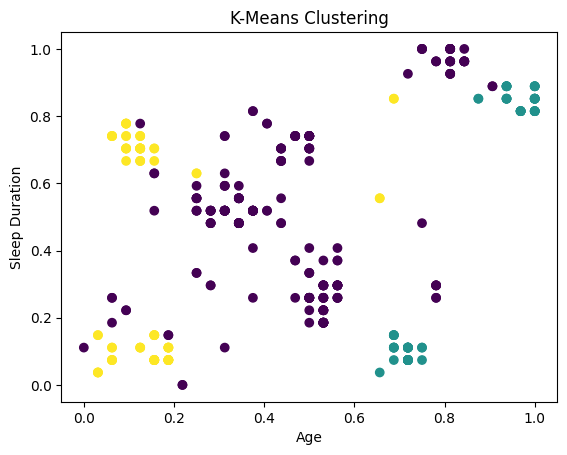

In [124]:
# Визуализация первых двух признаков
plt.scatter(df[numeric_features[0]], df[numeric_features[1]], c=clusters)
plt.title('K-Means Clustering')
plt.xlabel(numeric_features[0])
plt.ylabel(numeric_features[1])
plt.show()

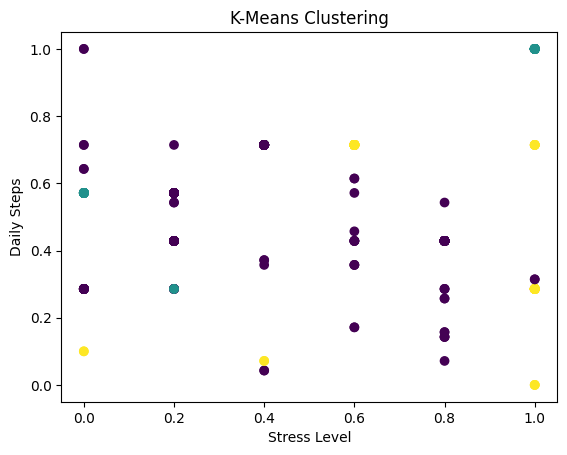

In [125]:
# Визуализация двух признаков Stress Level / Daily Steps
plt.scatter(df[numeric_features[4]], df[numeric_features[6]], c=clusters)
plt.title('K-Means Clustering')
plt.xlabel(numeric_features[4])
plt.ylabel(numeric_features[6])
plt.show()

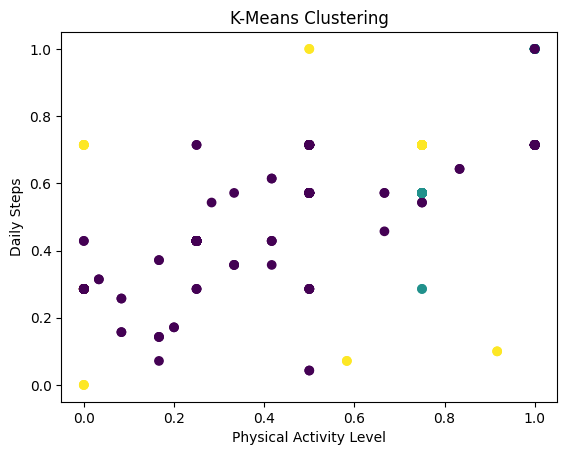

In [128]:
# Визуализация двух признаков Physical Activity Level / Daily Steps
plt.scatter(df[numeric_features[3]], df[numeric_features[6]], c=clusters)
plt.title('K-Means Clustering')
plt.xlabel(numeric_features[3])
plt.ylabel(numeric_features[6])
plt.show()

In [48]:
df_not_processed.head(10)

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,kmeans_cluster
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN,0
1,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN,2
2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN,2
3,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,2
4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,2
5,Male,28,Software Engineer,5.9,4,30,8,Obese,140/90,85,3000,Insomnia,2
6,Male,29,Teacher,6.3,6,40,7,Obese,140/90,82,3500,Insomnia,0
7,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,NaN,2
8,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,NaN,2
9,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,NaN,2


In [56]:
# Группируем по номеру кластера и выводим средние значения признаков для каждого кластера
cluster_mean_table = df_not_processed.groupby('kmeans_cluster').mean(numeric_only=True)

In [57]:
cluster_mean_table

,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
kmeans_cluster,,,,,,,
0,42.161702,7.212766,7.506383,54.531915,4.897872,69.136170,6442.978723
1,53.953846,7.095385,7.523077,82.384615,5.492308,71.569231,8415.384615
2,31.918919,6.908108,6.513514,53.513514,6.837838,72.202703,6600.000000




*   Кластеры отчётливо выделяют группы: более молодые с худшими показателями сна (кластер 2), старшие с лучшей физической активностью и качеством сна (кластер 1), и средняя группа (кластер 0).
*   График по методу локтя показал оптимальный k=2–4 (хорошее разделение).
* Визуализация показывает довольно чёткое разделение на группы по основным признакам.




###3. Подбор числа кластеров (метод локтя)

In [137]:
inertia = []
silhouettes = []
K = range(2, 10)

for k in k_range:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(df)

    inertia.append(model.inertia_)  # внутренняя метрика K-Means
    silhouettes.append(silhouette_score(df, model.labels_))  # внешняя метрика

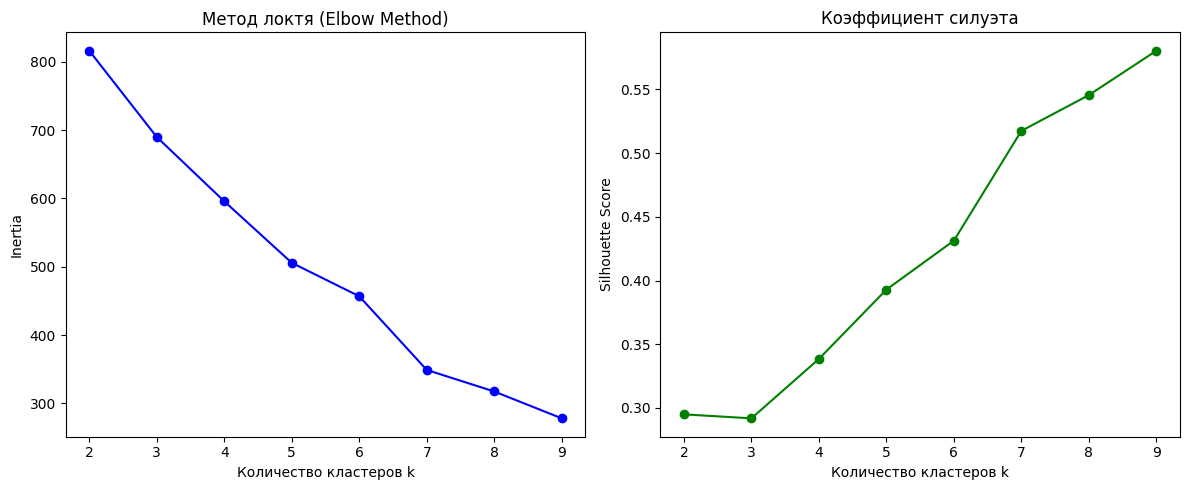

In [135]:
# Визуализация "метода локтя"
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(k_range, inertia, 'bo-')
plt.xlabel('Количество кластеров k')
plt.ylabel('Inertia')
plt.title('Метод локтя (Elbow Method)')

plt.subplot(1,2,2)
plt.plot(k_range, silhouettes, 'go-')
plt.xlabel('Количество кластеров k')
plt.ylabel('Silhouette Score')
plt.title('Коэффициент силуэта')
plt.tight_layout()
plt.show()

График показывает "локоть" — точку излома (обычно 2-4 кластера). Наилучший k — где дальнейшее увеличение кластеров незначительно снижает инерцию.

###4. Кластеризация DBSCAN

In [104]:
# Обучаем DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5) # значения могут быть подобраны экспериментально
db_clusters = dbscan.fit_predict(df)

In [102]:
# Записи в исходном датасете номера кластеров
df_not_processed['dbscan_cluster'] = db_clusters

In [138]:
# Статистика по найденным кластерам (без "шума")
print("Количество кластеров DBSCAN:", len(set(db_clusters)) - (1 if -1 in db_clusters else 0))
df_not_processed['dbscan_cluster'].value_counts()

Количество кластеров DBSCAN: 15


,count
dbscan_cluster,
-1,91
9,32
5,31
0,31
8,29
10,28
2,26
1,25
6,25


Количество кластеров DBSCAN при eps=0.3, min_samples=10: 11

In [82]:
# Оценка силуэта только по точкам, не равным -1 (без "шума")
mask = df_not_processed['dbscan_cluster'] != -1
if mask.sum() > 1 and (len(set(db_clusters[mask])) > 1):  # силует считается только если есть минимум 2 кластера
    sil_dbscan = silhouette_score(df[mask], db_clusters[mask])
    print("Silhouette Score DBSCAN:", sil_dbscan)
else:
    print("Для оценки силуэта недостаточно данных (кластеров без шума меньше двух).")


Silhouette Score DBSCAN: 0.9608208796091489


In [105]:
# Средние значения признаков по каждому кластеру (без "шума" – только для валидных кластеров)
cluster_means = df_not_processed[mask].groupby('dbscan_cluster').mean(numeric_only=True)
cluster_means

,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,kmeans_cluster
dbscan_cluster,,,,,,,,
-1,38.500000,6.772727,7.272727,49.090909,5.727273,68.727273,6409.090909,0.454545
0,30.483871,7.738710,7.000000,75.000000,6.000000,70.000000,8000.000000,2.000000
1,32.320000,6.060000,6.000000,30.000000,8.000000,72.000000,5000.000000,2.000000
2,37.076923,7.161538,8.000000,60.000000,4.000000,68.000000,7000.000000,0.000000
3,38.333333,7.241667,8.000000,60.000000,5.000000,68.000000,8000.000000,0.000000
4,41.235294,7.735294,8.000000,90.000000,5.000000,69.764706,8000.000000,0.000000
5,43.548387,6.400000,6.000000,45.000000,7.000000,72.000000,6000.000000,0.000000
6,44.320000,6.580000,7.000000,45.000000,4.000000,65.000000,6000.000000,0.000000
7,43.000000,7.766667,8.000000,90.000000,5.000000,70.000000,8000.000000,0.000000


DBSCAN определяет кластеры "плотностью" — группы точек, расположенных рядом друг с другом.
Кластеризация подходит для данных с неявной структурой, чувствительна к параметрам eps/min_samples.

Результаты:

Число кластеров: 15

Silhouette Score достаточно высокий (
≈
0.96
≈0.96), что говорит о хорошем качестве кластеризации по плотности.

В средних по кластерам видно группировку по возрасту, продолжительности сна, физической активности.

Выделяются небольшие плотные группы и аномалии (например, по Steps, Blood Pressure, Sleep Disorder).

###5. Общий вывод

K-Means хорошо работает на компактных, преимущественно сферических кластерах с примерно похожим числом объектов. Результат понятен, интерпретируем, структура кластеров логична.

DBSCAN находит кластеры произвольной формы, хорошо выделяет выбросы и аномалии, не требует заранее задавать число кластеров. Особенно полезен для поиска шумовых и редких объектов.


Если цель — находить чётко заданные, крупные группы (например, сегменты по возрасту, стилю жизни), где распределение признаков достаточно "гладкое" — K-Means даёт понятную и интерпретируемую картину.

Если задача — выявлять аномалии, выбросы, редкие или "отдельно стоящие" группы (например, маленькие кластеры людей с крайне необычными параметрами сна, активности, давления), то DBSCAN работает эффективнее.

Для используемого датасета:
Внутри данных есть как однотипные группы (например, по возрасту и типу деятельности), так и выбросы (редкие сочетания нарушений сна/шагов/давления).

Если цель анализа:
*   выявить клиническое или спортивное сегментирование, K-Means будет предпочтительнее.
*   выявить аномалии, редкие паттерны сна, медицинские риски — DBSCAN даст более подходящую информацию.


In [139]:
# Инициализация и обучение K-Means
kmeans = KMeans(n_clusters=11, random_state=42)
clusters = kmeans.fit_predict(df)

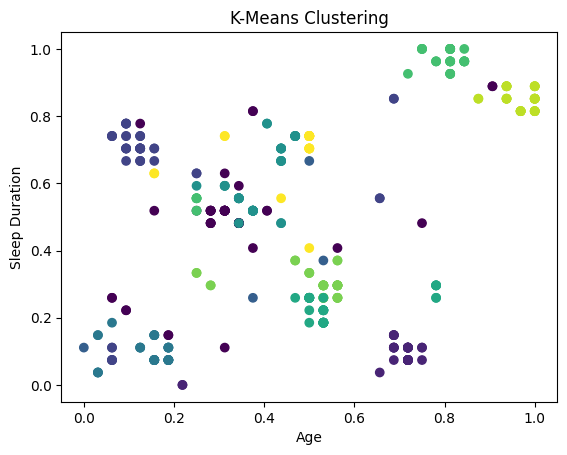

In [140]:
# Визуализация первых двух признаков Age / Sleep Duration
plt.scatter(df[numeric_features[0]], df[numeric_features[1]], c=clusters)
plt.title('K-Means Clustering')
plt.xlabel(numeric_features[0])
plt.ylabel(numeric_features[1])
plt.show()

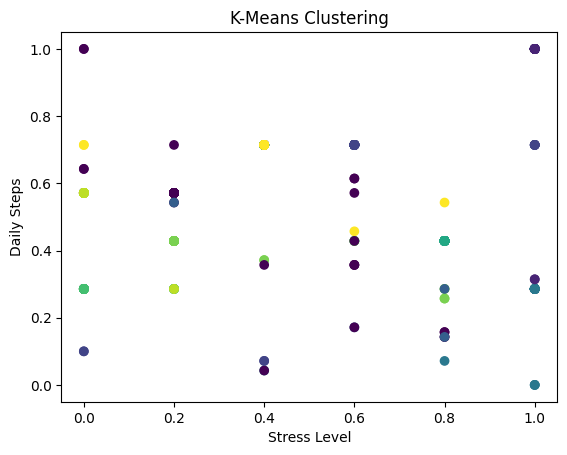

In [141]:
# Визуализация двух признаков Stress Level / Daily Steps
plt.scatter(df[numeric_features[4]], df[numeric_features[6]], c=clusters)
plt.title('K-Means Clustering')
plt.xlabel(numeric_features[4])
plt.ylabel(numeric_features[6])
plt.show()

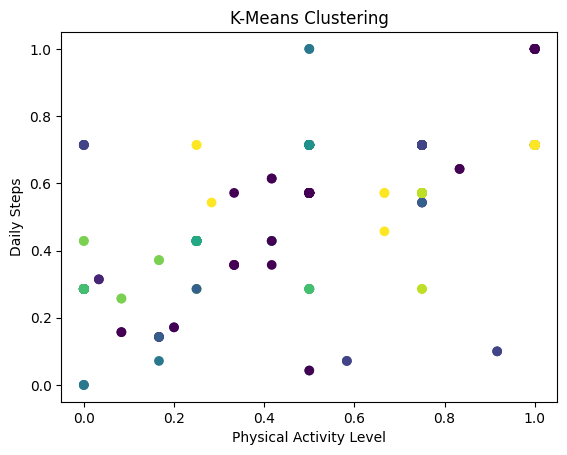

In [142]:
# Визуализация двух признаков Physical Activity Level / Daily Steps
plt.scatter(df[numeric_features[3]], df[numeric_features[6]], c=clusters)
plt.title('K-Means Clustering')
plt.xlabel(numeric_features[3])
plt.ylabel(numeric_features[6])
plt.show()